## Zomato Restaurant Project

#### Problem Statement:
Zomato Data Analysis is one of the most useful analysis for foodies who want to taste the best cuisines of every part of the world which lies in their budget. This analysis is also for those who want to find the value for money restaurants in various parts of the country for the cuisines. Additionally, this analysis caters the needs of people who are striving to get the best cuisine of the country and which locality of that country serves that cuisines with maximum number of restaurants.

##### Data Storage:
This problem statement contains two datasets- Zomato.csv and country_code.csv.

1. Country_code.csv contains two variables:
- Country code
- Country name
  
2. The collected data has been stored in the Comma Separated Value file Zomato.csv. Each
restaurant in the dataset is uniquely identified by its Restaurant Id. Every Restaurant contains the following variables:

- Restaurant Id: Unique id of every restaurant across various cities of the world
- Restaurant Name: Name of the restaurant
- Country Code: Country in which restaurant is located
- City: City in which restaurant is located
- Address: Address of the restaurant
- Locality: Location in the city
- Locality Verbose: Detailed description of the locality
- Longitude: Longitude coordinate of the restaurant&#39;s location
- Latitude: Latitude coordinate of the restaurant&#39;s location
- Cuisines: Cuisines offered by the restaurant
- Average Cost for two: Cost for two people in different currencies ��
- Currency: Currency of the country
- Has Table booking: yes/no
- Has Online delivery: yes/ no
- Is delivering: yes/ no
- Switch to order menu: yes/no
- Price range: range of price of food
- Aggregate Rating: Average rating out of 5
- Rating color: depending upon the average rating color
- Rating text: text on the basis of rating of rating
- Votes: Number of ratings casted by people

##### Problem statement : 
In this dataset predict 2 things –

1) Average Cost for two
2) Price range
   
##### Hint : Use pandas merge operation -- pd.merge (df1,df2) to combine two datasets

### Import Libraries

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler, LabelEncoder

### Load the Datasets

In [20]:
zomato = pd.read_csv(r"C:\Users\sharm\Downloads\Datasets\zomato.csv")
country_code = pd.read_excel(r"C:\Users\sharm\Downloads\Datasets\Country-Code.xlsx") # pip install openpyxl in cmd 

# Merging the dataset
data = pd.merge(zomato, country_code, on='Country Code')

In [23]:
# Display the first few rows
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [25]:
# Display the last few rows
data.tail()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
9546,5915730,Naml۱ Gurme,208,stanbul,"Kemanke Karamustafa Pa a Mahallesi, R۱ht۱m ...",Karak _y,"Karak _y, stanbul",28.977392,41.022793,Turkish,...,No,No,No,No,3,4.1,Green,Very Good,788,Turkey
9547,5908749,Ceviz A ac۱,208,stanbul,"Ko uyolu Mahallesi, Muhittin st _nda Cadd...",Ko uyolu,"Ko uyolu, stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,No,No,No,No,3,4.2,Green,Very Good,1034,Turkey
9548,5915807,Huqqa,208,stanbul,"Kuru _e me Mahallesi, Muallim Naci Caddesi, N...",Kuru _e me,"Kuru _e me, stanbul",29.034640,41.055817,"Italian, World Cuisine",...,No,No,No,No,4,3.7,Yellow,Good,661,Turkey
9549,5916112,A k Kahve,208,stanbul,"Kuru _e me Mahallesi, Muallim Naci Caddesi, N...",Kuru _e me,"Kuru _e me, stanbul",29.036019,41.057979,Restaurant Cafe,...,No,No,No,No,4,4.0,Green,Very Good,901,Turkey
9550,5927402,Walter's Coffee Roastery,208,stanbul,"Cafea a Mahallesi, Bademalt۱ Sokak, No 21/B, ...",Moda,"Moda, stanbul",29.026016,40.984776,Cafe,...,No,No,No,No,2,4.0,Green,Very Good,591,Turkey


### EDA (Exploratory Data Analysis)

#### 1. Statistical Analysis

In [29]:
data.shape

(9551, 22)

In [32]:
# Check for missing value
print(data.isnull().sum())

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64


In [34]:
# null values are present in "Cuisines"

In [37]:
# Check for duplicate values
print(data.duplicated().sum())

0


In [39]:
# no duplicate values are present

In [42]:
# Summary of the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [45]:
data.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


#### 2. Handle Missing value

In [49]:
# Fill missing values in 'Cuisines' with 'Unknown'
data['Cuisines'] = data['Cuisines'].fillna('Unknown')

In [51]:
# Drop rows with missing 'Average Cost for Two' or 'Price Range'
data = data.dropna(subset=['Average Cost for two', 'Price range'])

### Encoding the data

In [55]:
label_encoder = LabelEncoder()

catergorical_columns = ['Restaurant Name', 'Address', 'City', 'Locality', 'Locality Verbose', 'Currency', 'Cuisines', 'Has Table booking','Has Online delivery', 'Is delivering now', 'Switch to order menu', 'Rating color', 'Rating text', 'Country']

for feature in catergorical_columns:
    data[feature] = label_encoder.fit_transform(data[feature])

In [58]:
# Convert float columns to int

data = data.astype({col: 'int' for col in data.select_dtypes(include='float').columns})

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Restaurant ID         9551 non-null   int64
 1   Restaurant Name       9551 non-null   int64
 2   Country Code          9551 non-null   int64
 3   City                  9551 non-null   int64
 4   Address               9551 non-null   int64
 5   Locality              9551 non-null   int64
 6   Locality Verbose      9551 non-null   int64
 7   Longitude             9551 non-null   int64
 8   Latitude              9551 non-null   int64
 9   Cuisines              9551 non-null   int64
 10  Average Cost for two  9551 non-null   int64
 11  Currency              9551 non-null   int64
 12  Has Table booking     9551 non-null   int64
 13  Has Online delivery   9551 non-null   int64
 14  Is delivering now     9551 non-null   int64
 15  Switch to order menu  9551 non-null   int64
 16  Price 

#### Visualisation

1. Univariate Analysis : Analyze individual features using visualizations.
2. Bivariate Analysis : Analyze relationships between features.
3. Multivariate Analysis : Analyze multiple features together.

##### 1. Univariate analysis

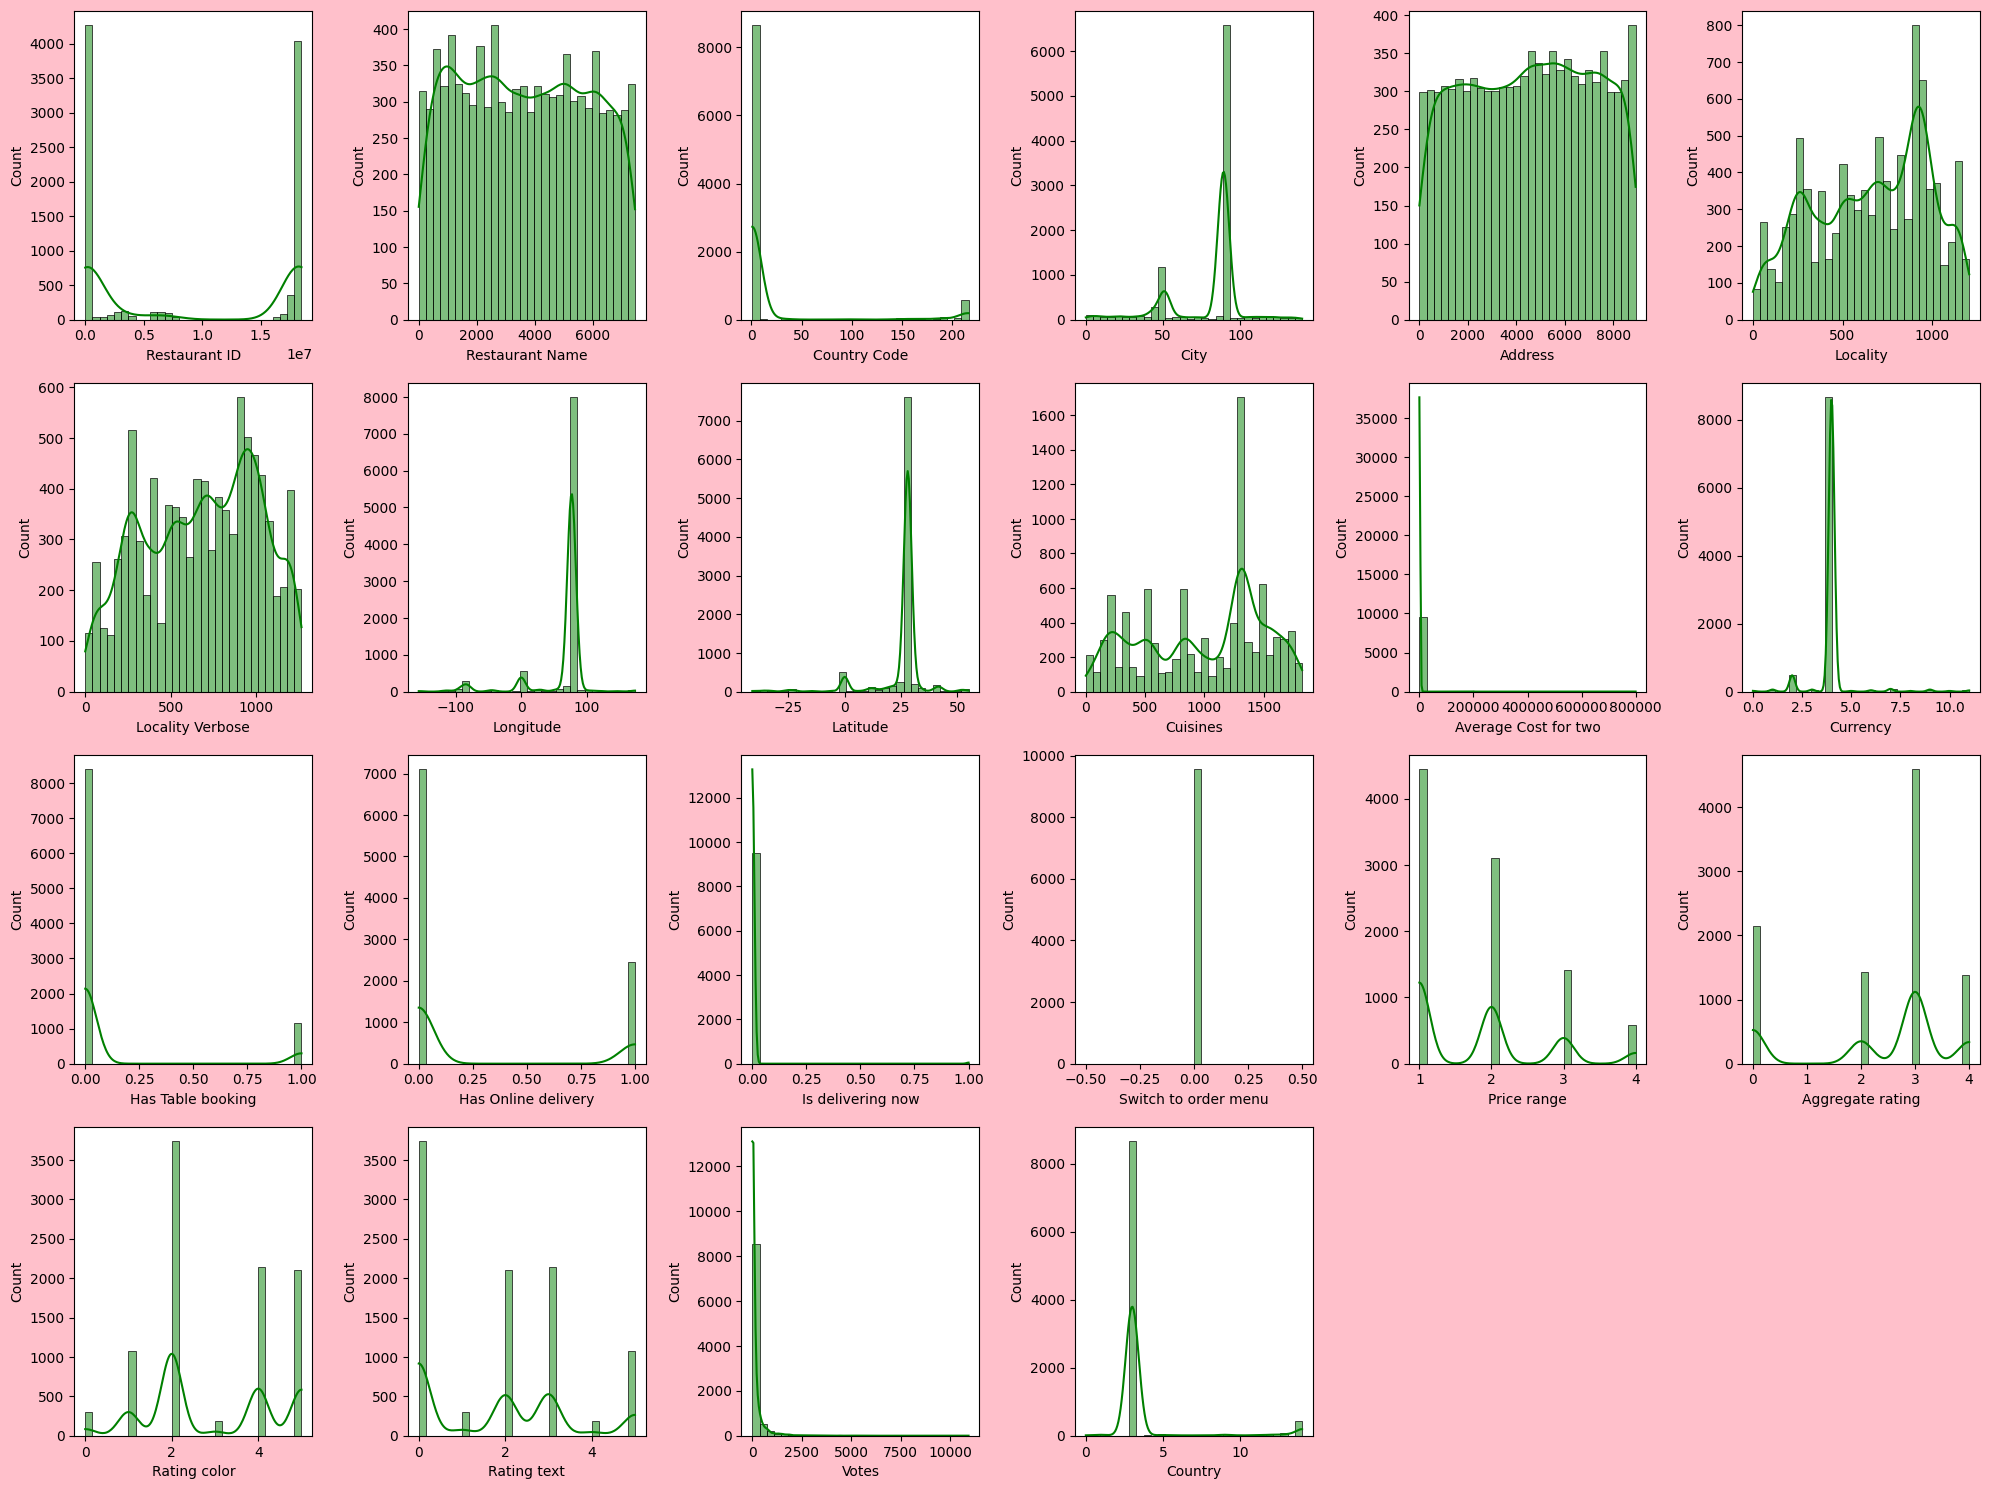

In [62]:
#Lets see how data is distributed for every column.
plt.figure(figsize=(20,15),facecolor='pink')
graph=1
for column in data:
    if graph <=22:
        ax=plt.subplot(4,6,graph)
        sns.histplot(data[column], kde=True, bins=30, color='green', ax=ax)
        plt.xlabel(column)
    graph +=1
plt.tight_layout()

##### 2. Bivariate Analysis

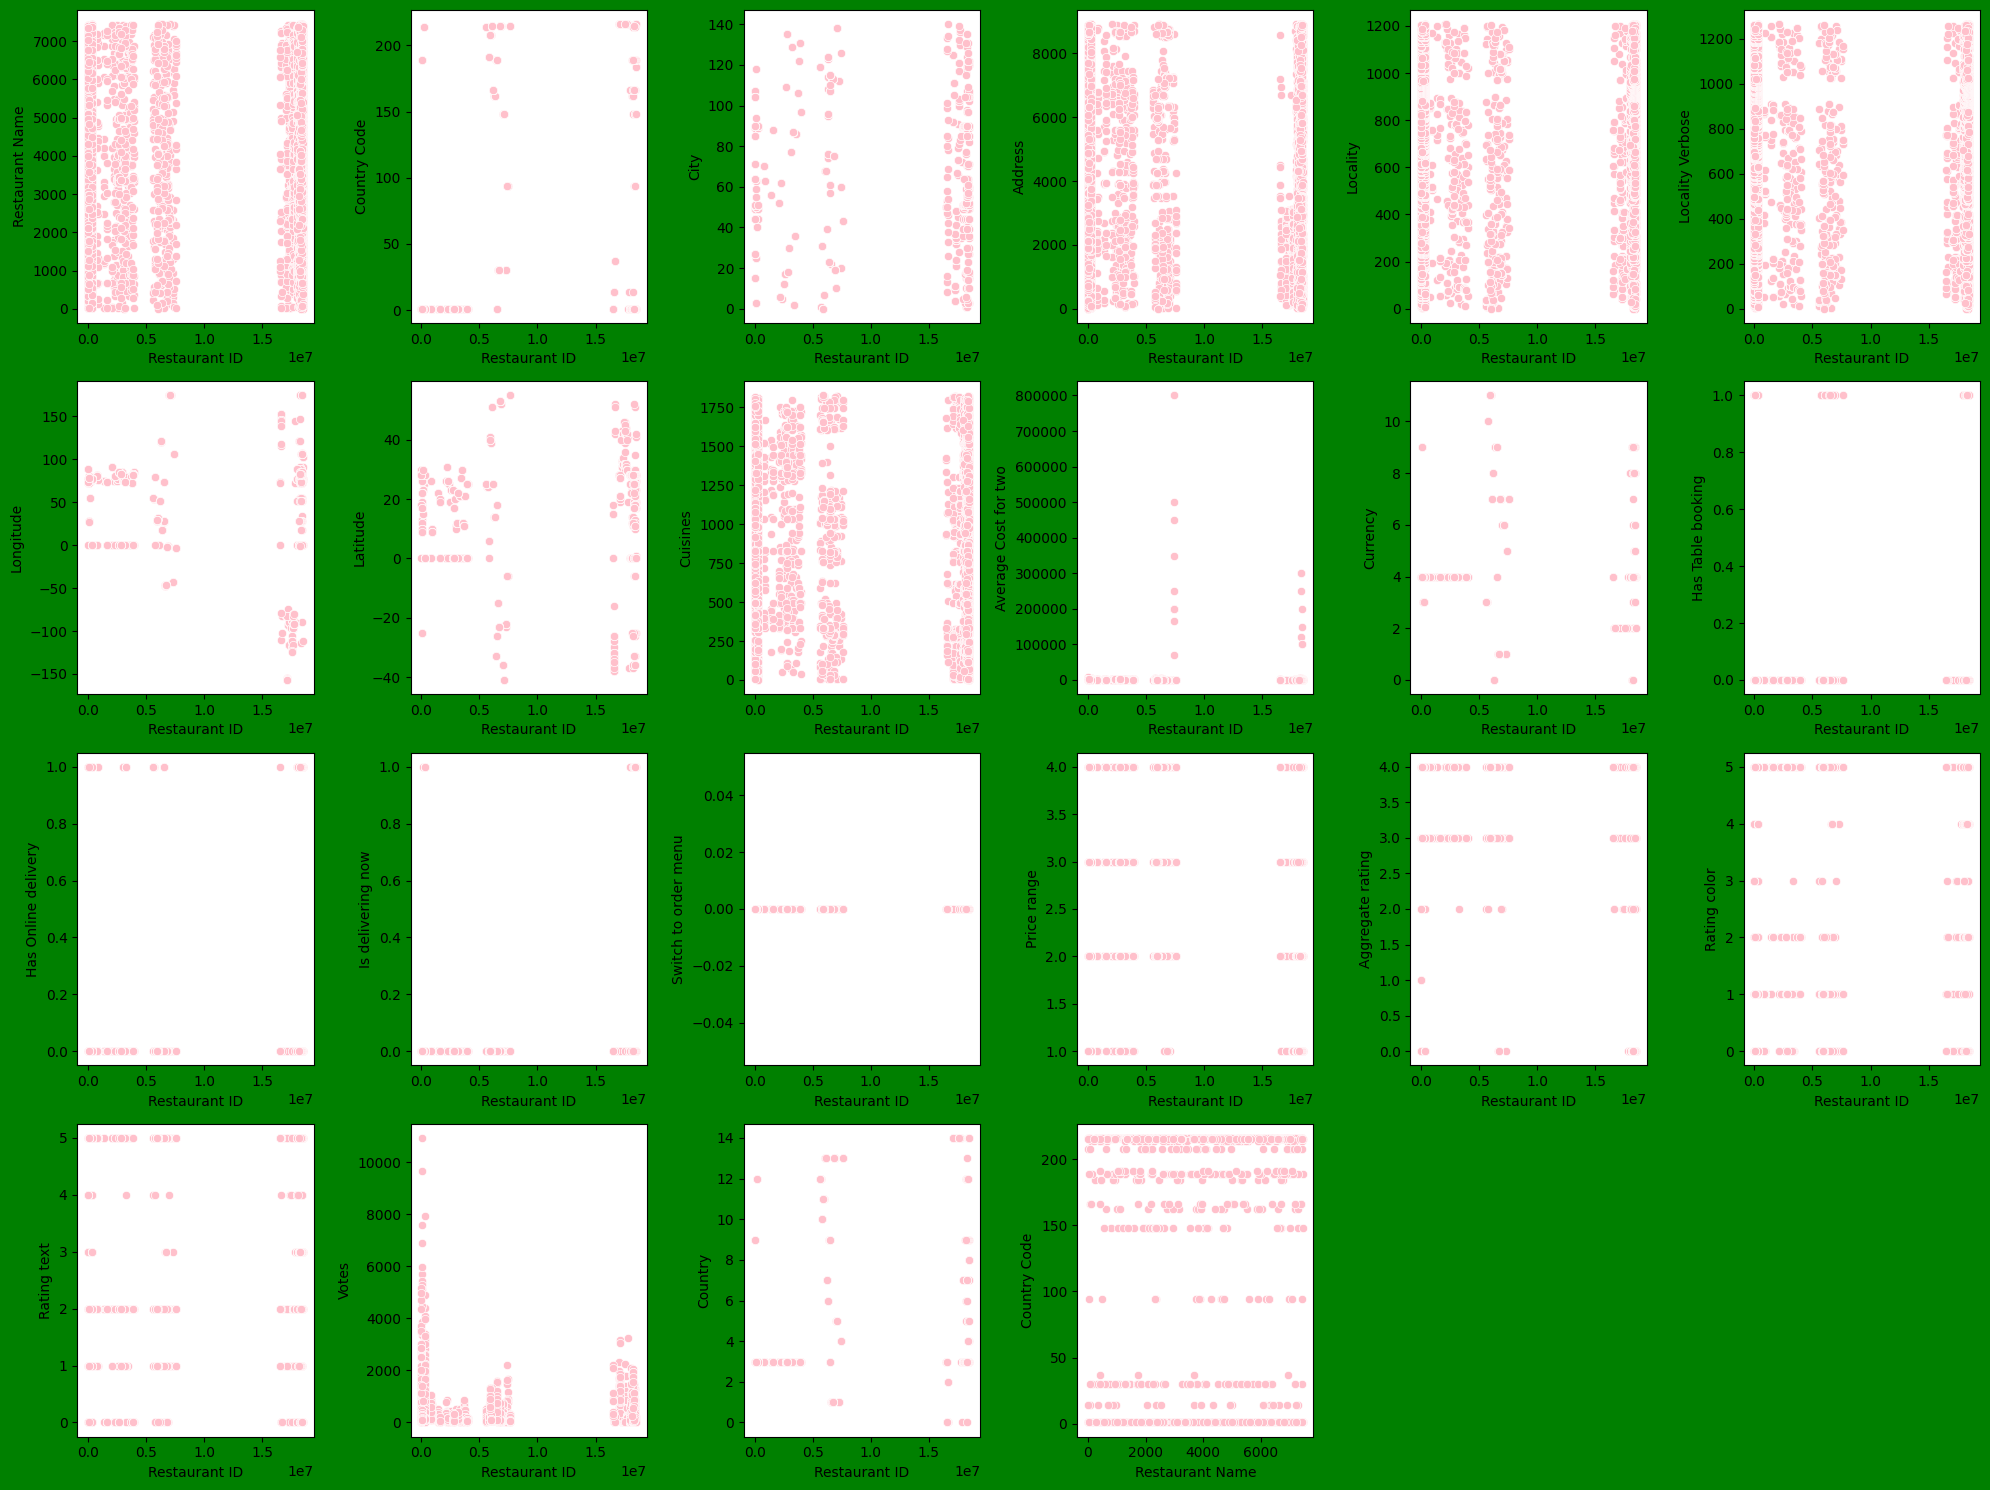

In [64]:
plt.figure(figsize=(20, 15), facecolor='green')

# Create subplots for bivariate analysis (scatter plots)
graph = 1

for i in range(len(data.columns)):
    for j in range(i + 1, len(data.columns)):
        if graph <= 22:
            ax = plt.subplot(4, 6, graph)  
            
            #data.iloc[:, i]: This accesses the ith column from the dataset data using the .iloc[] method, which allows index-based selection.
            #data=data: This argument passes the entire dataset to the sns.scatterplot() function.
            
            sns.scatterplot(x=data.iloc[:, i], y=data.iloc[:, j], ax=ax, data=data, color='pink')  # Pass `data=data`
            ax.set_xlabel(data.columns[i])
            ax.set_ylabel(data.columns[j])
        graph += 1

plt.tight_layout()
plt.show()

##### 3. Multivariate Analysis

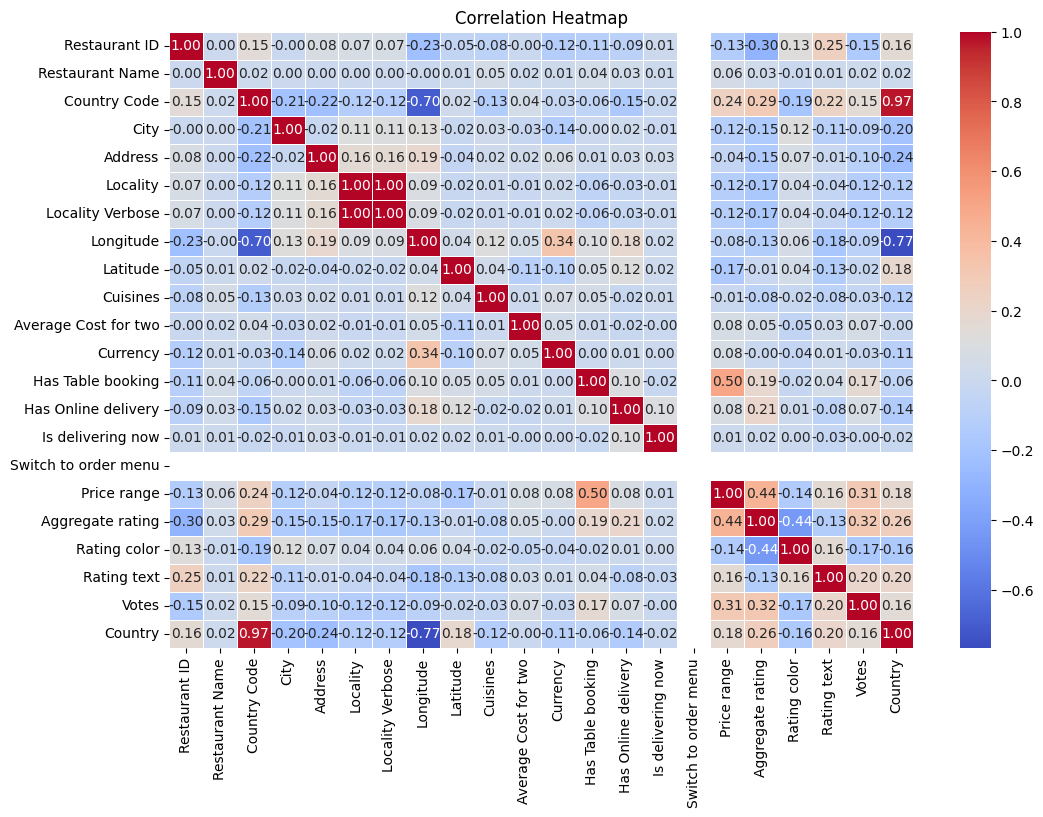

In [67]:
# Calculate the correlation matrix
corr_matrix = data.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

- r = 1: Perfect positive correlation — as one variable increases, the other increases proportionally.
- Country and Country Code: Correlation of 0.97 indicates they are essentially the same information. Drop one to avoid redundancy or multi-collinearity.
- Locality and Locality Verbose: Correlation of 1 indicates they are the same information.

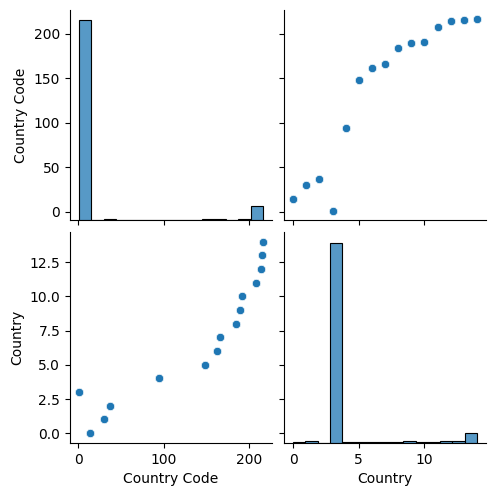

In [71]:
# Pairplot to visualize relationships between selected columns
sns.pairplot(data[['Country Code', 'Country']])
plt.show()

### Feature Engineering

Remove Redundant Features: Drop highly correlated pairs (e.g., Country Code or Country) to simplify the dataset.

In [75]:
data = data.drop(['Country','Locality Verbose'], axis=1)

In [77]:
x = data.drop(['Average Cost for two', 'Price range'], axis=1)
y1 = data[['Average Cost for two']]  # Regression
y2 = data[['Price range']]           # Classification

### Train-Test Split

In [81]:
xtrain, xtest, y1train, y1test = train_test_split (x, y1, test_size=0.20, random_state=42)
xtrain, xtest, y2train, y2test = train_test_split (x, y2, test_size=0.20, random_state=42)

### Standard scaler

In [84]:
scaler = RobustScaler()

In [86]:
x_trainscaled = scaler.fit_transform(xtrain)
x_testscaled = scaler.fit_transform(xtest)

### VIF (Variance Inflation Factor)

In [89]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [91]:
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(x_trainscaled, i) for i in range(x_trainscaled.shape[1])]
vif['Feature'] = x.columns  # Use the original feature names from your DataFrame

# Check VIF values
vif

C:\Users\sharm\AppData\Roaming\Python\Python312\site-packages\statsmodels\regression\linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


,vif,Feature
0,1.444218,Restaurant ID
1,1.007164,Restaurant Name
2,2.779877,Country Code
3,1.223564,City
4,1.108501,Address
5,1.082457,Locality
6,2.936760,Longitude
7,1.079983,Latitude
8,1.103841,Cuisines
9,1.355045,Currency


VIF = 1: No correlation with other variables (no multicollinearity).

1 < VIF < 5: Moderate correlation with other variables. It’s usually acceptable.

## Model Performance

### SVR(Support Vector Regressor) and SVM (Support Vector Machine)

### y1

In [97]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

svr = SVR(kernel='linear')
svr.fit(x_trainscaled, y1train)
y1pred_train_svr = svr.predict(x_trainscaled)
y1pred_test_svr = svr.predict(x_testscaled)

print("\n================== Support Vector Regression (SVR) ==================")
print("Training MSE:", mean_squared_error(y1train, y1pred_train_svr))
print("Testing MSE:", mean_squared_error(y1test, y1pred_test_svr))
print("R2 Score:", r2_score(y1test, y1pred_test_svr))

C:\Users\sharm\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



================== Support Vector Regression (SVR) ==================
Training MSE: 229903017.9920136
Testing MSE: 381604467.07178426
R2 Score: -0.0012369457029353104


### y2

In [100]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(x_trainscaled, y2train)
y2pred_svm = svm_model.predict(x_testscaled)

print("\n================== Support Vector Machine (SVM) ==================")
print("Accuracy:", accuracy_score(y2test, y2pred_svm))
print("Classification Report:\n", classification_report(y2test, y2pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y2test, y2pred_svm))

C:\Users\sharm\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



================== Support Vector Machine (SVM) ==================
Accuracy: 0.619570905285191
Classification Report:
               precision    recall  f1-score   support

           1       0.68      0.83      0.75       907
           2       0.54      0.45      0.49       618
           3       0.53      0.54      0.53       266
           4       0.48      0.09      0.15       120

    accuracy                           0.62      1911
   macro avg       0.56      0.48      0.48      1911
weighted avg       0.60      0.62      0.60      1911

Confusion Matrix:
 [[752 152   3   0]
 [285 277  55   1]
 [ 47  64 144  11]
 [ 22  16  71  11]]


### Decision Tree Regressor and Classifier

### y1

In [104]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(random_state=42)
dtr.fit(x_trainscaled, y1train)
y1pred_train_dtr = dtr.predict(x_trainscaled)
y1pred_test_dtr = dtr.predict(x_testscaled)

print("\n================== Decision Tree Regression ==================")
print("Training MSE:", mean_squared_error(y1train, y1pred_train_dtr))
print("Testing MSE:", mean_squared_error(y1test, y1pred_test_dtr))
print("R2 Score:", r2_score(y1test, y1pred_test_dtr))


================== Decision Tree Regression ==================
Training MSE: 0.0
Testing MSE: 247439286.41653585
R2 Score: 0.3507797293892727


### y2

In [107]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(x_trainscaled, y2train)
y2pred_dtc = dtc.predict(x_testscaled)

print("\n================== Decision Tree Classification ==================")
print("Accuracy:", accuracy_score(y2test, y2pred_dtc))
print("Classification Report:\n", classification_report(y2test, y2pred_dtc))
print("Confusion Matrix:\n", confusion_matrix(y2test, y2pred_dtc))


================== Decision Tree Classification ==================
Accuracy: 0.5117739403453689
Classification Report:
               precision    recall  f1-score   support

           1       0.66      0.52      0.58       907
           2       0.39      0.49      0.44       618
           3       0.45      0.54      0.49       266
           4       0.55      0.49      0.52       120

    accuracy                           0.51      1911
   macro avg       0.51      0.51      0.51      1911
weighted avg       0.54      0.51      0.52      1911

Confusion Matrix:
 [[471 376  52   8]
 [213 305  87  13]
 [ 18  77 143  28]
 [  9  19  33  59]]


### KNN and Logistic Regression

### y1

In [111]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Initialize KNN Regressor
knn = KNeighborsRegressor(n_neighbors=5)  

# Train the model
knn.fit(x_trainscaled, y1train)

# Predictions
y1pred_train = knn.predict(x_trainscaled)
y1pred_test = knn.predict(x_testscaled)

# Evaluate the model
print("================== KNN Regression ==================")
print("Training MSE:", mean_squared_error(y1train, y1pred_train))
print("Testing MSE:", mean_squared_error(y1test, y1pred_test))
print("R2 Score:", r2_score(y1test, y1pred_test))

================== KNN Regression ==================
Training MSE: 60916079.3789686
Testing MSE: 142461082.154809
R2 Score: 0.6262169049730119


### y2

In [114]:
#from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Logistic Regression model
lr_model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
lr_model.fit(x_trainscaled, y2train)

# Make predictions
y2pred_lr = lr_model.predict(x_testscaled)

# Evaluate the model
print("Logistic Regression Accuracy:", accuracy_score(y2test, y2pred_lr))
print("="*60)
print("\nLogistic Regression Classification Report:\n")
print(classification_report(y2test, y2pred_lr))
print("="*60)
print("Logistic Regression Confusion Matrix:\n")
print(confusion_matrix(y2test, y2pred_lr))

C:\Users\sharm\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Logistic Regression Accuracy: 0.6232339089481946

Logistic Regression Classification Report:

              precision    recall  f1-score   support

           1       0.69      0.83      0.76       907
           2       0.53      0.43      0.48       618
           3       0.52      0.50      0.51       266
           4       0.52      0.29      0.37       120

    accuracy                           0.62      1911
   macro avg       0.57      0.51      0.53      1911
weighted avg       0.61      0.62      0.61      1911

Logistic Regression Confusion Matrix:

[[757 139   9   2]
 [287 265  59   7]
 [ 34  75 134  23]
 [ 13  18  54  35]]


C:\Users\sharm\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Cross Validation of KNN and Logistic Regression

### y1

In [118]:
# Perform cross-validation (using negative MSE for regression)
cv_scores = cross_val_score(knn, x_trainscaled, y1train, cv=5, scoring='neg_mean_squared_error')

# Print cross-validation results
print("Cross-Validation Scores (Negative MSE):", cv_scores)
print("Mean Cross-Validation Score (Negative MSE):", cv_scores.mean())
print("Standard Deviation of Cross-Validation Scores:", cv_scores.std())

Cross-Validation Scores (Negative MSE): [-7.68450961e+07 -5.47527615e+07 -4.35193572e+07 -1.91474850e+08
 -1.66353645e+07]
Mean Cross-Validation Score (Negative MSE): -76645485.94034031
Standard Deviation of Cross-Validation Scores: 60603084.48956232


### y2

In [121]:
# Cross-validation
cv_scores_lr = cross_val_score(lr_model, x_trainscaled, y2train, cv=5, scoring='accuracy')
print("Logistic Regression Cross-validation scores (Accuracy):", cv_scores_lr)
print("Mean Logistic Regression CV score (Accuracy):", cv_scores_lr.mean())
print("Standard Deviation of Logistic Regression CV scores:", cv_scores_lr.std())

C:\Users\sharm\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sharm\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\sharm\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Plea

Logistic Regression Cross-validation scores (Accuracy): [0.6354712  0.62041885 0.60732984 0.61125654 0.6315445 ]
Mean Logistic Regression CV score (Accuracy): 0.6212041884816754
Standard Deviation of Logistic Regression CV scores: 0.010977610652493076


C:\Users\sharm\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### HyperParameter Tuning

### y1

In [125]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 15, 20],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Initialize KNN Regressor
knn = KNeighborsRegressor()

# Set up GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

# Fit the model to find the best parameters
grid_search.fit(x_trainscaled, y1train)

# Print best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score (Negative MSE):", grid_search.best_score_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'uniform'}
Best Cross-Validation Score (Negative MSE): -66662646.02081952


In [127]:
# Get the best model
best_knn = grid_search.best_estimator_

# Make predictions using the best model
y1pred_test_best = best_knn.predict(x_testscaled)

# Evaluate the best model
print("Testing MSE (Best Model):", mean_squared_error(y1test, y1pred_test_best))
print("R2 Score (Best Model):", r2_score(y1test, y1pred_test_best))

Testing MSE (Best Model): 147531430.72822222
R2 Score (Best Model): 0.6129135483371512


### y2

In [130]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],        # Regularization type
    'solver': ['liblinear', 'saga'], # Solvers suitable for l1 regularization
    'max_iter': [100, 200, 300],    # Maximum iterations
    'tol': [1e-4, 1e-3, 1e-2]       # Tolerance for stopping criteria
}

# Initialize the Logistic Regression model
lr = LogisticRegression()

# Set up GridSearchCV
grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit the model
grid_search.fit(x_trainscaled, y2train)

# Get best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
Best Parameters: {'C': 1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.0001}
Best Accuracy: 0.6179319371727748


C:\Users\sharm\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [132]:
# Get the best model from GridSearchCV
best_rf_model = grid_search.best_estimator_

# Make predictions using the best model
y2pred = best_rf_model.predict(x_testscaled)

# Evaluate the tuned model
print("Accuracy (Tuned):", accuracy_score(y2test, y2pred))
print("="*60)
print("\nClassification Report (Tuned):\n")
print(classification_report(y2test, y2pred))
print("="*60)
print("Confusion Matrix (Tuned):\n")
print(confusion_matrix(y2test, y2pred))

Accuracy (Tuned): 0.6232339089481946

Classification Report (Tuned):

              precision    recall  f1-score   support

           1       0.69      0.84      0.76       907
           2       0.55      0.42      0.47       618
           3       0.52      0.53      0.52       266
           4       0.51      0.24      0.33       120

    accuracy                           0.62      1911
   macro avg       0.57      0.51      0.52      1911
weighted avg       0.61      0.62      0.61      1911

Confusion Matrix (Tuned):

[[762 136   8   1]
 [293 260  60   5]
 [ 38  66 140  22]
 [ 14  15  62  29]]


### Saving the model

In [135]:
import pickle

model = best_rf_model

# Save the model to a file
with open("zomato_model.pkl", "wb") as file:
    pickle.dump(model, file)